In [1]:
%pip install pandas matplotlib seaborn yfinance


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2025-11-11'

# fetch data 
data = yf.download(tickers=ticker,start=start_date,end=end_date)

data.reset_index(inplace=True)

# display data 
print(data.head())


/var/folders/b1/q44029jx1wbdmqw13ddfzf7m0000gn/T/ipykernel_45316/2659689109.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=ticker,start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  183.903244  186.677052  182.169616  185.399112  82488700
1      2024-01-03  182.526215  184.140970  181.713879  182.496496  58414500
2      2024-01-04  180.208130  181.377083  179.187767  180.445875  71983600
3      2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
4      2024-01-08  183.823959  183.863594  179.801946  180.386422  59144500


In [4]:
# check info
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        467 non-null    datetime64[ns]
 1   (Close, AAPL)   467 non-null    float64       
 2   (High, AAPL)    467 non-null    float64       
 3   (Low, AAPL)     467 non-null    float64       
 4   (Open, AAPL)    467 non-null    float64       
 5   (Volume, AAPL)  467 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 22.0 KB
None
Price                            Date       Close        High         Low  \
Ticker                                       AAPL        AAPL        AAPL   
count                             467  467.000000  467.000000  467.000000   
mean    2024-12-06 01:14:00.256959488  214.546200  216.616239  212.253547   
min               2024-01-02 00:00:00  163.664902  165.053568  162.752348   
25%               20

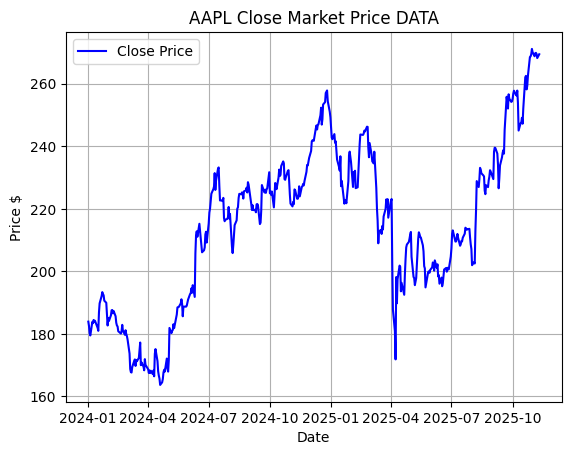

In [5]:
plt.Figure(figsize=(12,6))
plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.title('AAPL Close Market Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


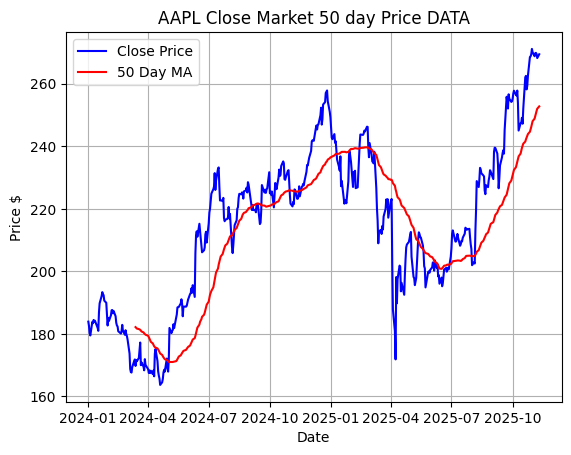

In [6]:
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.plot(data['Date'],data['MA50'],label='50 Day MA',color='red')

plt.title('AAPL Close Market 50 day Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


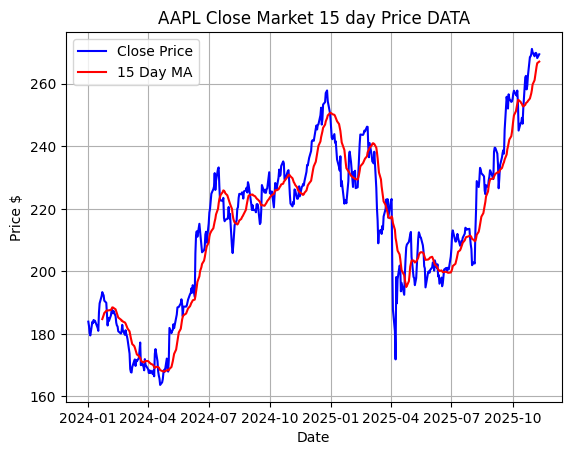

In [7]:
data['MA15'] = data['Close'].rolling(window=15).mean()

plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.plot(data['Date'],data['MA15'],label='15 Day MA',color='red')

plt.title('AAPL Close Market 15 day Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Calculate RSI Using Pandas

# Step 7: Calculate 14-day RSI
def calculate_rsi(data, period=14):
    # Calculate daily price changes
    delta = data['Close'].diff()
    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Apply RSI
data['RSI_14'] = calculate_rsi(data, period=14)

# Display last few rows to verify
print(data[['Date', 'Close', 'RSI_14']].tail(10))

Price        Date       Close     RSI_14
Ticker                   AAPL           
457    2025-10-28  268.739471  61.176941
458    2025-10-29  269.438812  67.163566
459    2025-10-30  271.137146  83.891081
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301
465    2025-11-07  268.209991  63.596702
466    2025-11-10  269.429993  64.662820


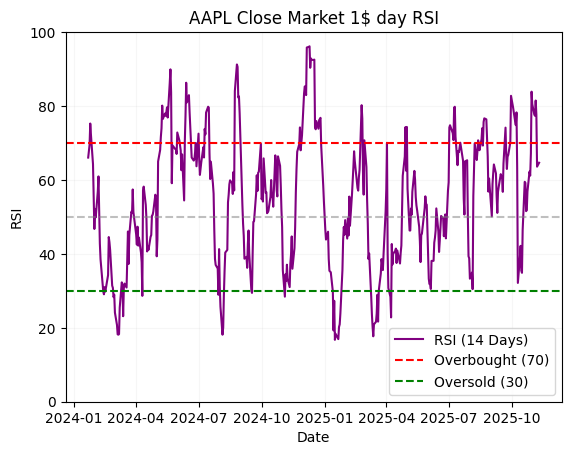

In [ ]:
# RSI 
plt.plot(data['Date'],data['RSI_14'],label="RSI (14 Days)",color='purple')
plt.axhline(y=70,color='r',linestyle='--',label='Overbought (70)')
plt.axhline(y=30,color='g',linestyle='--',label='Oversold (30)')
plt.axhline(y=50,color='gray',linestyle='--',alpha=0.5)


plt.title('AAPL Close Market 1$ day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True,alpha=0.3)
plt.ylim(0,100)
plt.show()

In [11]:
Overbought = data[data['RSI_14'] > 70][['Date','Close','RSI_14']]
Oversold = data[data['RSI_14'] < 30][['Date','Close','RSI_14']]
print(Overbought)

Price        Date       Close     RSI_14
Ticker                   AAPL           
16     2024-01-25  192.353424  75.267932
17     2024-01-26  190.619781  72.230982
87     2024-05-07  180.924088  71.608668
88     2024-05-08  181.261368  74.006190
89     2024-05-09  183.076569  80.117025
..            ...         ...        ...
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301

[91 rows x 3 columns]


In [12]:
print(Oversold)

Price        Date       Close     RSI_14
Ticker                   AAPL           
29     2024-02-13  183.542755  29.777383
30     2024-02-14  182.659943  29.062259
32     2024-02-16  180.834839  29.825104
39     2024-02-28  179.952042  28.293561
40     2024-02-29  179.287460  28.973049
41     2024-03-01  178.206268  24.112714
42     2024-03-04  173.683197  20.766714
43     2024-03-05  168.743454  18.228323
44     2024-03-06  167.751556  18.143344
45     2024-03-07  167.632553  18.275042
46     2024-03-08  169.348526  25.466077
49     2024-03-13  169.745316  23.133074
68     2024-04-10  166.422394  28.638599
144    2024-07-30  217.323944  28.936380
147    2024-08-02  218.376801  25.701824
148    2024-08-05  207.858246  18.134166
149    2024-08-06  205.831985  20.088371
150    2024-08-07  208.404526  28.931901
178    2024-09-17  215.576752  29.444040
212    2024-11-04  220.767532  28.425635
258    2025-01-13  233.344620  29.808437
259    2025-01-14  232.229675  19.287552
260    2025-01-1

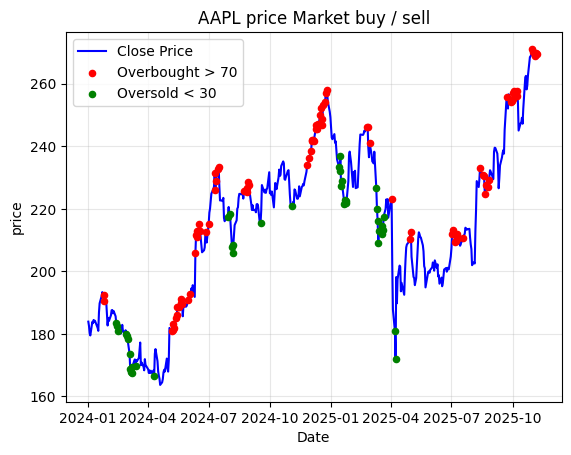

In [15]:
# https://www.nseindia.com/report-detail/display-bulk-and-block-deals

plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
# mark 
plt.scatter(Overbought['Date'],Overbought['Close'],color='red',s=20,label='Overbought > 70',zorder=5)

plt.scatter(Oversold['Date'],Oversold['Close'],color='green',s=20,label='Oversold < 30',zorder=5)

plt.title('AAPL price Market buy / sell')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()